Biomarkers - is a redflag that in body something can be wrong MGMT_value = 1
Tumor -  guz, dzieli się na core, enhancing - powierzchnia rozrastania i reszte po odjęciu od całości tych 2

CSF - cerebral spinal fluid
t1 - T1-weighting causes the nerve connections of white matter to appear white, and the congregations of neurons of gray matter to appear gray, while CSF appears dark.
t2 - T2-weighting causes the nerve connections of white matter to appear gray, and the congregations of neurons of gray matter to appear white, while the CSF appears light.
t1ce -
flair - FLAIR is a heavily T2-weighted technique causing the nerve connections of white matter to appear gray, and the congregations of neurons of gray matter to appear white, while the CSF appears dark.


In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

In [2]:
import nipy
from nibabel.testing import data_path
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib
import pickle

In [3]:
class CaseReader:
    def __init__(self, path):
        self.tmg = None
        self.case = {}
        self.path = path
        self.load_data()
        

    def load_data(self):
        for file in self.path.iterdir():
            self.tmg = nib.load(file)
            sample = self.tmg.get_fdata()
            if 'flair' in file.name:
                self.case['flair'] = sample
            elif 't1ce' in file.name:
                self.case['t1ce'] = sample
            elif 'seg' in file.name:
                self.case['seg'] = sample
            elif 't1' in file.name:
                self.case['t1'] = sample
            elif 't2' in file.name:
                self.case['t2'] = sample

    def plot_scan(self, ax, scan: str = 'flair', sampling: int = 30):
        slice = self.case[scan]
        mask = (slice > 0).nonzero()
        x, y, z = mask
        y = y[::sampling]
        x = x[::sampling]
        z = z[::sampling]
        colors = slice[x, y, z]
        ax.scatter(x, y, z, c=colors, alpha=0.1, s=1.0)
    
    def plot_segments(self, ax,
                            colors: list = ['red', 'yellow', 'green'],
                            sampling: list = [1, 7, 7],
                            sizes: list = [6.0, 2.0, 2.0]):
        
        segments = self.case['seg']

        segments_info = {0:{"color": colors[0], "class_idx": 1, "name": 'core', "sampling":sampling[0], "size": sizes[0], "alpha": 1.0},
                         1:{"color": colors[1], "class_idx": 2, "name": 'invaded', "sampling":sampling[1], "size": sizes[1], "alpha": 0.2},
                         2:{"color": colors[2], "class_idx": 4, "name": 'enhanced', "sampling": sampling[2], "size": sizes[2], "alpha": 0.2}}

        for seg in segments_info:
            seg_info = segments_info[seg]
            seg_mask = (segments == seg_info['class_idx']).nonzero()
            seg_x, seg_y, seg_z = seg_mask
            seg_x = seg_x[::seg_info['sampling']]
            seg_y = seg_y[::seg_info['sampling']]
            seg_z = seg_z[::seg_info['sampling']]

            ax.scatter(seg_x, seg_y, seg_z, c=seg_info['color'], alpha=seg_info['alpha'], linewidth=seg_info['size'], label=seg_info['name'])



/tmp/ipykernel_2396/2967215520.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


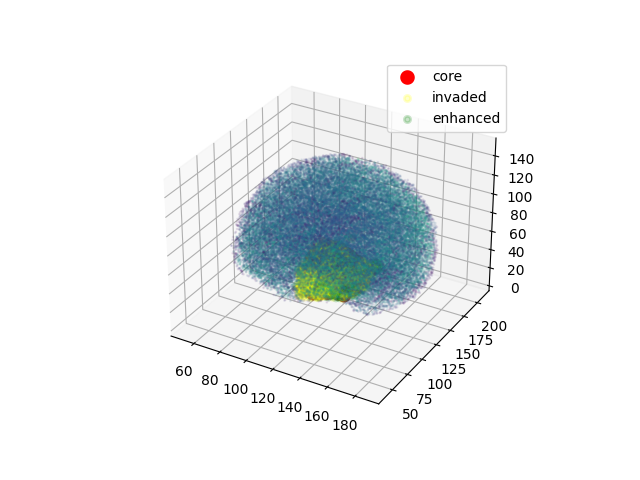

In [4]:
path_dataset = pathlib.Path('../datasets/brain/BraTS2021_training_df/BraTS2021_00000/')
reader = CaseReader(path_dataset)

fig = plt.figure()
ax = fig.gca(projection='3d')

reader.plot_scan(ax)
reader.plot_segments(ax, sampling=[1, 30, 30])
ax.legend()

/tmp/ipykernel_2396/760841965.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


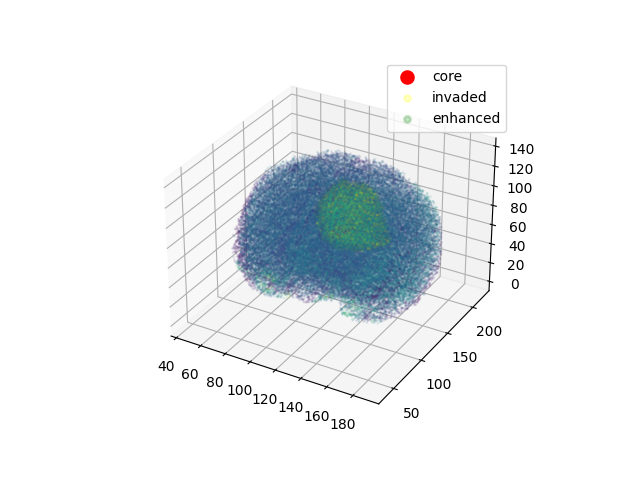

In [5]:
path_dataset = pathlib.Path('../datasets/brain/BraTS2021_training_df/BraTS2021_01663/')
reader = CaseReader(path_dataset)

fig = plt.figure()
ax = fig.gca(projection='3d')

reader.plot_scan(ax)
reader.plot_segments(ax, sampling=[1, 30, 30])
ax.legend()

In [6]:
tmg = nib.load(path_dataset / "BraTS2021_01663_flair.nii.gz")
